<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/7%2C8%2C9%EA%B0%95_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%987%EA%B0%95_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능 강의 7강: 의사결정트리

## 의사결정트리
- 어떤 칼럼의 중요도와 기준을 알려준다.
- 데이터를 가장 잘 분할하는 질문들을 찾아내고, 이를 통해 데이터를 예측 또는 분류하는 것

장점:
1. 기준을 명확하게 알려준다.
2. 칼럼 중요도를 알려준다.

단점:
1. 기준을 명확하게 나누기 때문에 과적합 문제에 취약할 수밖에 없다.
2. 질문자체가 의미없는 질문일 수 있다.

In [1]:
#임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#데이터 불러오기
A=pd.read_csv("/content/drive/MyDrive/xyzData.csv")
A_x=np.array(A['x']).reshape(-1,1)
A_y=np.array(A['y']).reshape(-1,1)
A_z=np.array(A['z']).reshape(-1,1)

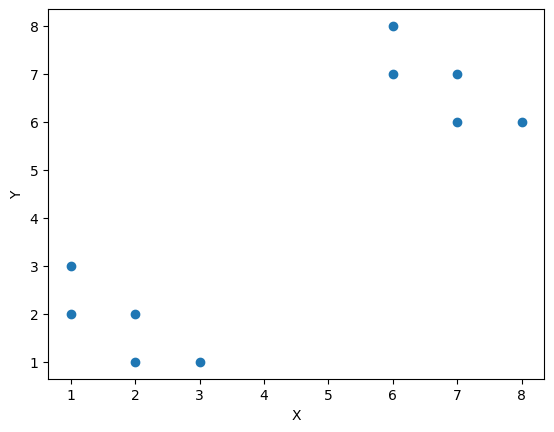

In [8]:
#데이터 만들고 시각화
x = np.arange(0,10)
#반열린구간 [start, stop) 에서 step 의 크기만큼 일정하게 떨어져 있는 숫자들을 array 형태로 반환해 주는 함수

plt.scatter(A_x,A_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
#data정의
data = np.column_stack((A_x, A_y)) # column_stack 함수는 1차원 벡터를 열벡터로 인식하여 연결하는 역할.
data

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

In [11]:
## split을 통해 Train Set, Test Set분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(
    data, A_z)

In [13]:
#의사결정트리 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree
DT = DecisionTreeClassifier(max_depth=2) #객체생성

In [14]:
#학습시키기
DT.fit(train_input, train_output)

DecisionTreeClassifier(max_depth=2)

In [16]:
#모델의 성능평가
DT.score(test_input, test_output)

1.0

[Text(0.5, 0.75, 'Y <= 4.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

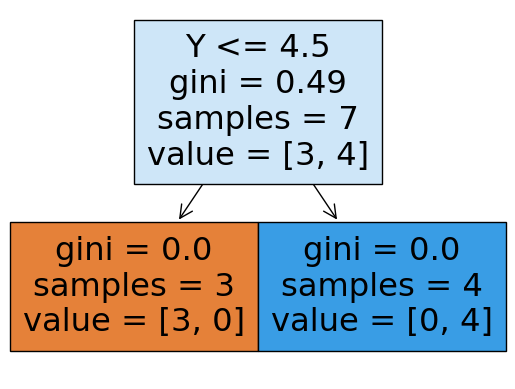

In [27]:
#DT 그려보기
plot_tree(DT, max_depth=2, filled=True, feature_names=['X', 'Y'])
#max_depth=2이면 총 노드는 3개가 된다.
#filled=True -> 이거 넣으니까 색깔 생김. 의사 결정 트리의 각 노드의 색상을 해당 노드의 클래스로 채우는 역할을 함.


In [28]:
#각 특성(feature)이 의사 결정 트리 모델에 얼마나 중요한 역할을 하는지를 나타내는 지표를 제공
DT.feature_importances_

array([0., 1.])